# BÀI TẬP 6 

In [153]:
pip install mlxtend --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library

In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth  
from mlxtend.preprocessing  import TransactionEncoder

In [143]:
path = '/content/drive/MyDrive/Data for ise lab/groceries.csv'
with open(path, 'r') as f:
    col_count = [ len(l.split(",")) for l in f.readlines() ]
del f

columns = [i for i in range(0, max(col_count))]
df = pd.read_csv(path, header=None, delimiter=",", names=columns)

In [144]:
df.shape

(9835, 32)

In [145]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Chuyển dữ liệu về dạng list trong list 

In [146]:
data= [df.iloc[i].dropna().tolist() for i in range(len(df))]
data[0:10]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals']]

Chuyển dữ liệu về dạng one-hot encoding bằng cách sử dụng hàm TransactionEncoder 

In [147]:
TE = TransactionEncoder()
temp = TE.fit(data).transform(data)
#TE.columns_

Chuyển dữ liệu về lại dạng DataFrame 

In [148]:
df = pd.DataFrame(temp, columns= TE.columns_)
df.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [180]:
def calc_time(df,algorithm):
  itemsets, excute_time = [], []
  i=1
  while(i!=11):
    start,total = 0, 0
    start = time.time()
    itemsets.append(algorithm(df, min_support=0.01*i, use_colnames=True))
    total = time.time() - start
    excute_time.append(total)
    i+=1
  print('Running success')
  return excute_time,itemsets

Giải thuật Apriori

In [181]:
time1, itemset_A = calc_time(df,apriori)

Running success


In [185]:
print(time1)

[0.30780959129333496, 0.09991931915283203, 0.05030488967895508, 0.029483318328857422, 0.024239301681518555, 0.012987852096557617, 0.011392354965209961, 0.007466554641723633, 0.005843400955200195, 0.004810333251953125]


In [175]:
itemset_A[0]

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, whole milk, tropical fruit)"
329,0.014540,"(yogurt, root vegetables, whole milk)"
330,0.010473,"(yogurt, whole milk, soda)"
331,0.015150,"(yogurt, whole milk, tropical fruit)"


Giải thuật FPGrowth 

In [183]:
time2, itemset_F = calc_time(df,fpgrowth)

Running success


In [186]:
print(time2)

[0.274552583694458, 0.1510465145111084, 0.22273874282836914, 0.09299516677856445, 0.08360457420349121, 0.06374859809875488, 0.0673227310180664, 0.05644869804382324, 0.048018455505371094, 0.04797816276550293]


In [176]:
itemset_F[0]

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
...,...,...
328,0.010168,"(rolls/buns, frozen vegetables)"
329,0.012405,"(yogurt, frozen vegetables)"
330,0.014235,"(other vegetables, onions)"
331,0.012100,"(whole milk, onions)"


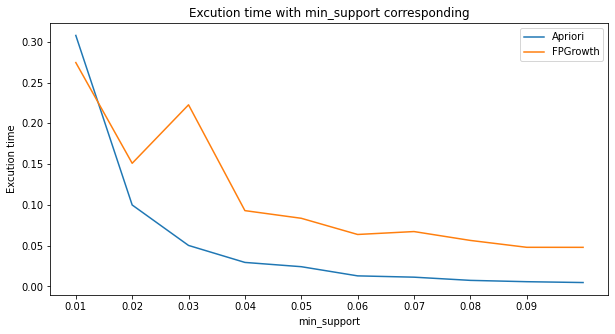

In [210]:
min_support = [i*0.01 for i in range(11)]
min_support.pop(0)
plt.figure(figsize = (10,5))
plt.plot(min_support, time1, label='Apriori')
plt.plot(min_support, time2, label='FPGrowth')
plt.xlabel('min_support')
plt.ylabel('Excution time')
plt.xticks(np.arange(0.01, 0.1, step=0.01))
plt.title('Excution time with min_support corresponding')
plt.legend()

#Nhận xét 

Ở trong dữ liệu groceries.csv này, giải thuật Apriori chạy nhanh hơn giải thuật FPGrowth vì:

- Giải thuật Apriori sử dụng chiến lược khá đơn giản là tìm kiếm theo chiều rộng  (ưu tiên cho tập ứng viên thỏa mãn min_support và bỏ qua những tập ứng viên khác) nên nó khá phù hợp để xử lí cơ sở dữ liệu lớn. Nhưng bù lại nó phải chạy qua bộ dữ liệu nhiều lần và số lượng tập ứng viên lớn.

- Giải thuật FPGrowth sử dụng chiến lược tìm kiếm theo chiều sâu nên nó khá phức tạp và có thể tốn kém khi gặp bộ cơ sở dữ liệu lớn ( bộ cơ sở dữ liệu càng lớn, phân chia thành càng nhiều nhóm xử lí và mất nhiều thời gian để xây dựng cây FP thêm vào đó còn phải tìm cơ sở mẫu điều kiện và xây dựng cây FP thỏa mãn min_support) nên FPGrowth chỉ phù hợp với bộ dữ liệu nhỏ và tập phổ biến sinh ra không quá dài .
